https://www.tensorflow.org/tutorials/non-ml/mandelbrot

In [68]:
# Import libraries for simulation
import tensorflow as tf
import numpy as np

# Imports for visualization
import PIL.Image
from io import BytesIO
from IPython.display import Image, display

a function to actually display the image once we have iteration counts.

In [69]:
def DisplayFractal(a, fmt='jpeg'):
  """Display an array of iteration counts as a colorful picture of a fractal."""
  a_cyclic = (6.28*a/20.0).reshape(list(a.shape)+[1])
  img = np.concatenate([10+20*np.cos(a_cyclic),
                        30+50*np.sin(a_cyclic),
                        155-80*np.cos(a_cyclic)], 2)
  img[a==a.max()] = 0
  a = img
  a = np.uint8(np.clip(a, 0, 255))
  f = BytesIO()
  PIL.Image.fromarray(a).save(f, fmt)
  display(Image(data=f.getvalue()))

<font color="blue"> analysis</font><br><br>
<code>a_cyclic = (6.28*a/30.0).reshape(list(a.shape)+[1])</code><br>
a.shape : rows and columns of a<br>
reshape : create matrix(행렬) <br>
[1] : each value will be converted to list by '+[1]'<br><br>

<code>np.concatenate(...)</code><br>
concatenate : combine arrays. <br>
axis = 0 : Y축 / axis = 1 : X축<br>

### <font color="tomato">Session and Variable Initialization</font>

In [70]:
sess = tf.InteractiveSession()

In [71]:
# Use NumPy to create a 2D array of complex numbers

Y, X = np.mgrid[-1.3 : 1.3 :0.005, -2 : 1 : 0.005]
Z = X+1j*Y

define and initialize TensorFlow tensors.

In [72]:
xs = tf.constant(Z.astype(np.complex64))
zs = tf.Variable(xs)
ns = tf.Variable(tf.zeros_like(xs, tf.float32))

variables must be initialized  before used

In [73]:
tf.global_variables_initializer().run()

### <font color="tomato">Defining and Running the Computation</font>

In [74]:
# Compute the new values of z: z^2 + x
zs_ = zs*zs + xs

# Have we diverged with this new value?
not_diverged = tf.abs(zs_) < 4

# Operation to update the zs and the iteration count.
#
# Note: We keep computing zs after they diverge! This
#       is very wasteful! There are better, if a little
#       less simple, ways to do this.

step = tf.group(
  zs.assign(zs_),
  ns.assign_add(tf.cast(not_diverged, tf.float32))
  )

run it for a couple hundred steps

In [75]:
for i in range(200): step.run()

Let's see what we've got.

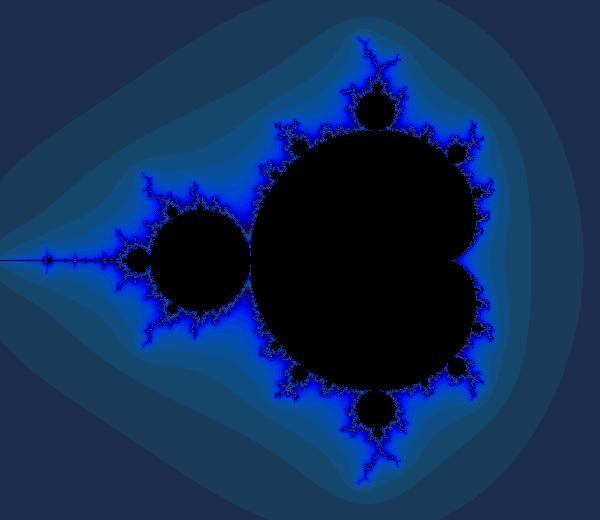

In [76]:
DisplayFractal(ns.eval())